In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
df_fake=pd.read_csv('Fake.csv')
df_true=pd.read_csv('True.csv')

In [ ]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [ ]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
df_fake["class"]=0
df_true["class"]=1

In [ ]:
df_fake.shape,df_true.shape

((23481, 5), (21417, 5))

In [ ]:
df_fake_test = df_fake.tail(10)
df_fake = df_fake.iloc[:-10]

df_true_test = df_true.tail(10)
df_true = df_true.iloc[:-10]


In [ ]:
df_fake.shape,df_true.shape

((23471, 5), (21407, 5))

In [ ]:
df_fake_test['class']=0
df_true_test['class']=1

In [ ]:
df_fake_test.head(5)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [ ]:
df_true_test.head(5)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [ ]:
merge_df=pd.concat([df_fake,df_true],axis=0)
merge_df.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
merge_df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
new_df=merge_df.drop(['title','subject','date'],axis=1)

In [ ]:
new_df.isnull().sum()

,0
text,0
class,0


In [ ]:
new_df=new_df.sample(frac=1)

In [ ]:
new_df.head(5)

,text,class
18249,"The unaccomplished Chelsea Clinton, wife of un...",0
6924,After months of criticism from the Clinton cam...,0
330,John McCain survived brutal torture and six ye...,0
12332,Something was bothering Donald Trump as he mad...,0
9721,"BURLINGAME, Calif. (Reuters) - The Californian...",1


In [ ]:
new_df.reset_index(inplace=True)
new_df.drop(['index'],axis=1,inplace=True)

In [ ]:
new_df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
new_df.head(5)

,text,class
0,"The unaccomplished Chelsea Clinton, wife of un...",0
1,After months of criticism from the Clinton cam...,0
2,John McCain survived brutal torture and six ye...,0
3,Something was bothering Donald Trump as he mad...,0
4,"BURLINGAME, Calif. (Reuters) - The Californian...",1


In [ ]:
def wordcheck(text):
  text=text.lower()
  text=re.sub('\[.*?\]', '',text)
  text=re.sub("\\W"," ",text)
  text=re.sub('https?://\S+|www\.\S+', '',text)
  text=re.sub('<.*?>+', '',text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '',text)
  text=re.sub('\n', '',text)
  text=re.sub('\w*\d\w*', '',text)
  return text

In [ ]:
new_df['text']=new_df['text'].apply(wordcheck)

In [ ]:
x=new_df['text']
y=new_df['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
vx_train=vectorization.fit_transform(x_train)
vx_test=vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(vx_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=lr.predict(vx_test)

In [ ]:
lr.score(vx_test,y_test)

0.9856283422459893

In [ ]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4625
           1       0.99      0.99      0.99      4351

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(vx_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt=dt.predict(vx_test)

In [ ]:
dt.score(vx_test,y_test)

0.9965463458110517

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(vx_train,y_train)

RandomForestClassifier()

In [ ]:
pred_rf=rf.predict(vx_test)

In [ ]:
rf.score(vx_test,y_test)

0.9893048128342246

In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4625
           1       0.99      0.99      0.99      4351

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [ ]:
def output_result(n):
  if n==0:
    return "Fake News"
  elif n==1:
    return "True News"

def testing_df(news):
  testing_news={"text":[news]}
  new_def_test=pd.DataFrame(testing_news)
  new_def_test["text"]=new_def_test["text"].apply(wordcheck)
  new_x_test=new_def_test["text"]
  new_vx_test=vectorization.transform(new_x_test)
  pred_lr=lr.predict(new_vx_test)
  pred_rf=rf.predict(new_vx_test)

  return print("\n\nLR Prediction: {} \nRF Prediction: {}".format(output_result(pred_lr[0]),output_result(pred_rf[0])))


In [ ]:
news=str(input())
testing_df(news)

Belarus’ authoritarian leader Alexander Lukashenko pardoned 20 more people that rights activists describe as political prisoners, a statement on the president’s website said Saturday.  The announcement came amid persistent oppression in the runup to presidential elections next month that are likely to extend Lukashenko’s decades-long rule.  Belarusian officials did not provide the names of those released, but the statement posted on the president’s website said all of them had been convicted of “crimes of an extremist nature.”  The statement said the group included 11 women and 14 of those pardoned suffered from chronic illnesses.  “All of those released repented for their actions and appealed to the head of state to be pardoned,” the presidential administration said in a statement, using wording familiar from a series of previous group pardons in the past six months.  Saturday’s announcement marks the eighth such pardon by Lukashenko since the summer. In all, 207 political prisoners h

Exploratory Data Analysis

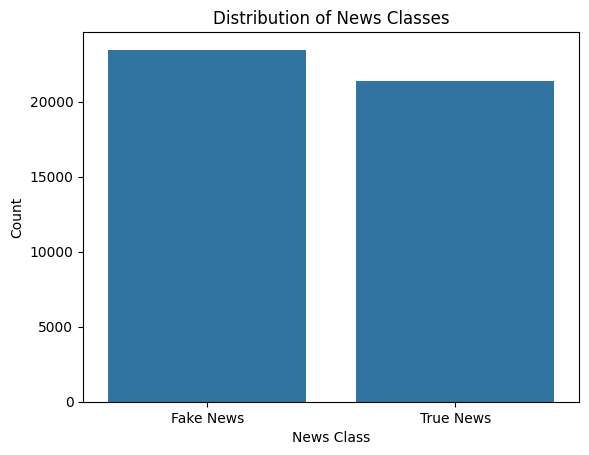

In [53]:
sns.countplot(data=new_df, x='class')
plt.title("Distribution of News Classes")
plt.xticks([0, 1], ['Fake News', 'True News'])
plt.xlabel("News Class")
plt.ylabel("Count")
plt.show()

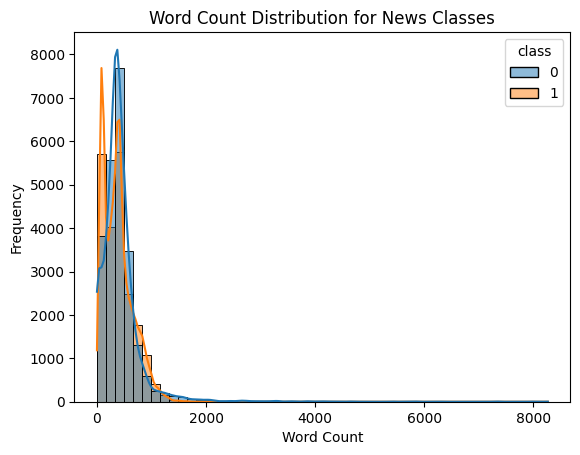

In [54]:
new_df['word_count'] = new_df['text'].apply(lambda x: len(x.split()))
sns.histplot(data=new_df, x='word_count', hue='class', bins=50, kde=True)
plt.title("Word Count Distribution for News Classes")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


Model Analysis

<ipython-input-55-d8118cc58e23>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coefs, y=top_features, palette="coolwarm")


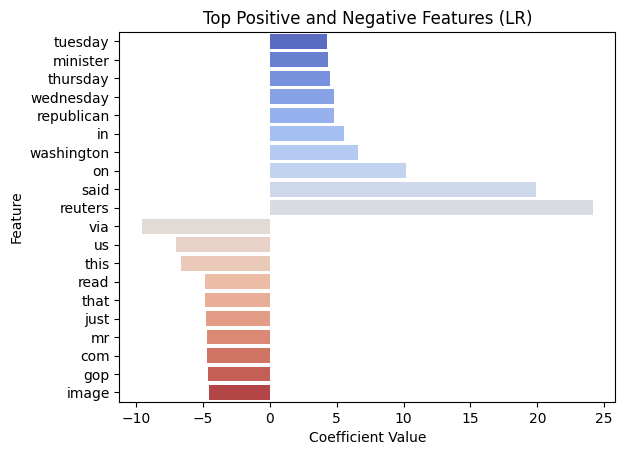

In [55]:
feature_names = vectorization.get_feature_names_out()
coefs = lr.coef_[0]
top_positive_indices = coefs.argsort()[-10:]
top_negative_indices = coefs.argsort()[:10]
top_features = [feature_names[i] for i in top_positive_indices] + [feature_names[i] for i in top_negative_indices]
top_coefs = np.concatenate([coefs[top_positive_indices], coefs[top_negative_indices]])

sns.barplot(x=top_coefs, y=top_features, palette="coolwarm")
plt.title("Top Positive and Negative Features (LR)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


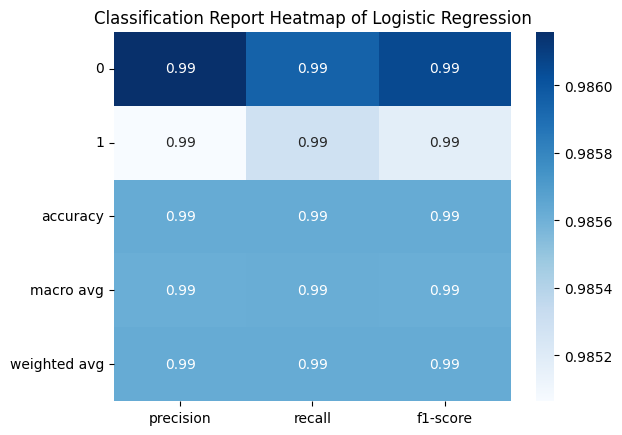

In [61]:
report = classification_report(y_test, pred_lr, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap of Logistic Regression")
plt.show()


Feature Engineering

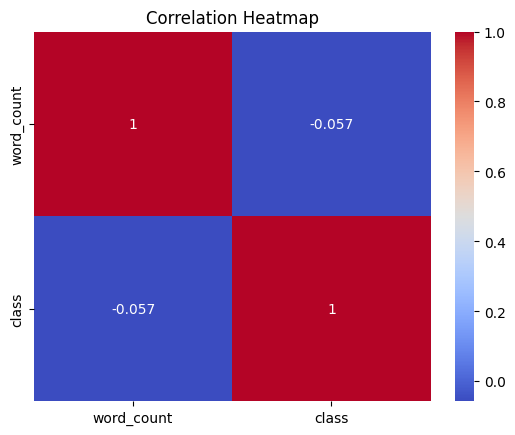

In [60]:
correlation_data = new_df[['word_count', 'class']].corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
